<a href="https://colab.research.google.com/github/weathon/3d2smile/blob/main/Hill's_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [282]:
library(dplyr)

In [283]:
PQN <- function (X) {

  obs <- dim(X)[1] #Define number of observations.
  dimm <- dim(X)[2] #Define number of variables (dimensions).

  X[0==X] <- 1E-08 #Set zeroes to an arbitrarily small value.
  normRef <- apply(X,2,function(x){median(x[x>1E-08])}) #Define reference spectrum as median for all analytes.

  M <- matrix(rep(normRef, each=obs), ncol=length(normRef)) #Convert reference spectrum in matrix equivalent in size to data matrix.
  Q <- X/M #Divide the concentration of the analyte in each sample by the median value for each analyte.
  Q[0.001 >= Q] <- NA  #Set very small values of "Q" equal to NA for elimination in a subsequent step.
  for (i in 1:obs) {
    X[i,] <- X[i,]/median(Q[i,], na.rm=TRUE)} #Divide each analyte in a given sample by the median quotient in that sample.

  X[1 >= X] <- 0 #Convert very small normalized values to 0.
  return(matrix(X, nrow=obs, ncol=dimm))
}

In [284]:
original_df <- read.csv("new_MO.csv")

In [285]:
original_df[is.na(original_df)] = 0

In [286]:
keep = c() #features need to be kept
total = 0
for(i in colnames(original_df)){
  if(startsWith(i, "X") & i!="Xpert")
  {
    total = total + 1
    t = original_df[(original_df["TBCat"]=="confirmed tb" | original_df["TBCat"]=="unlikely tb"),][i]
    if(sum(t==0)/nrow(t)<=0.2) #if the number of NA is less than 20% of the data, i.e. non-NA is 80%
    {
        keep = append(keep, i)
    }
  }
}

In [287]:
print("# Features before FOO: ")
print(total)
print("# Features after FOO: ")
print(length(keep))

[1] "# Features before FOO: "
[1] 938
[1] "# Features after FOO: "
[1] 335


In [288]:
room = original_df[original_df$TBClass==0, ]

In [289]:
original_df = original_df[original_df$TBCat=="confirmed tb" | original_df$TBCat=="unlikely tb", ] #https://www.statology.org/r-select-rows-by-condition/ forgot comma

In [291]:
data = original_df[c(c("TBCat", "RA"),keep)]
df = original_df[keep]

In [292]:
df[is.na(df)] = 0

In [293]:
df2 = df

In [294]:
df2 = apply(df2, 1, as.numeric)
# df = apply(df, 1, as.numeric)

In [295]:
df2 = PQN(df2)

In [296]:
df2 = log10(df2)
df2[is.infinite(df2)] = 0

df2 = (df2-mean(df2))/sd(df2)


In [297]:
#normal after log10

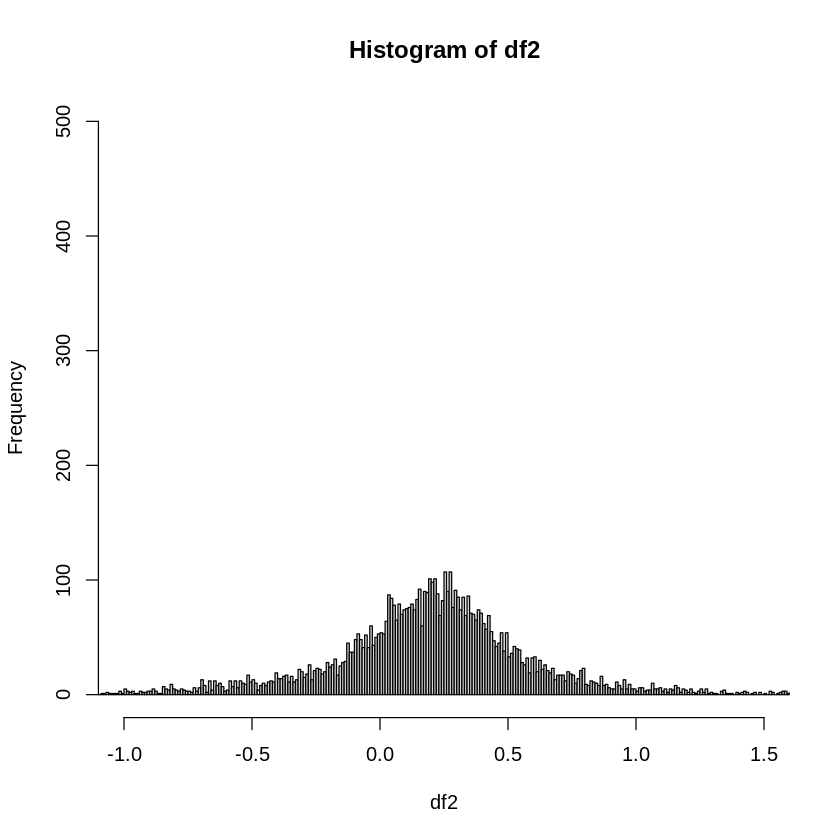

In [298]:
hist(df2, xlim=range(-1, 1.5), breaks = 500, ylim=range(0,500))

In [299]:
install.packages("ggfortify")
library(ggfortify)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



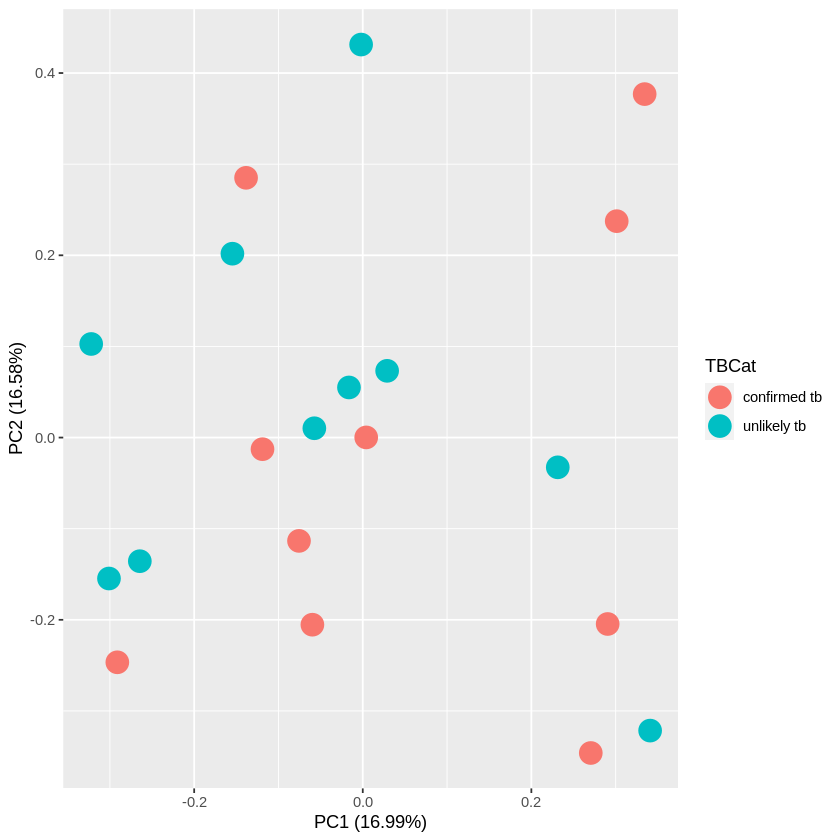

In [300]:
autoplot(prcomp(t(df2)), data=data, colour = "TBCat", size=6)

In [301]:
room = room[room$Unique.Identifier %in% data$RA,]

In [302]:
data = data[order(data$RA),]
room = room[order(room$Unique.Identifier),]

In [303]:
data$RA

[1] "A002040" "A002160" "A002452" "A003115" "A003224" "N02836"  "N06001" 
 [8] "N07828"  "N07972"  "N08874"  "N09393"  "N09490"  "N09577"  "N09578" 
[15] "N09612"  "N12271"  "N13658"  "N15486"  "N17948"  "N18017"

In [304]:
room$Unique.Identifier

[1] "A002040" "A002160" "A002452" "A003115" "A003224" "N02836"  "N06001" 
 [8] "N07828"  "N07972"  "N08874"  "N09393"  "N09490"  "N09577"  "N09578" 
[15] "N09612"  "N12271"  "N13658"  "N15486"  "N17948"  "N18017"

In [ ]:
keep2 = c()
p = c()
for(i in colnames(df)){
  if(i!="TBCat" & i!="RA")
  {
    p_tmp = wilcox.test(room[[i]], data[[i]], paired = TRUE, alternative = "two.sided")$p.value
    p = append(p, p_tmp)
    if(p_tmp<0.04)
    {
      keep2 = append(keep2, i)
    }

  }
}

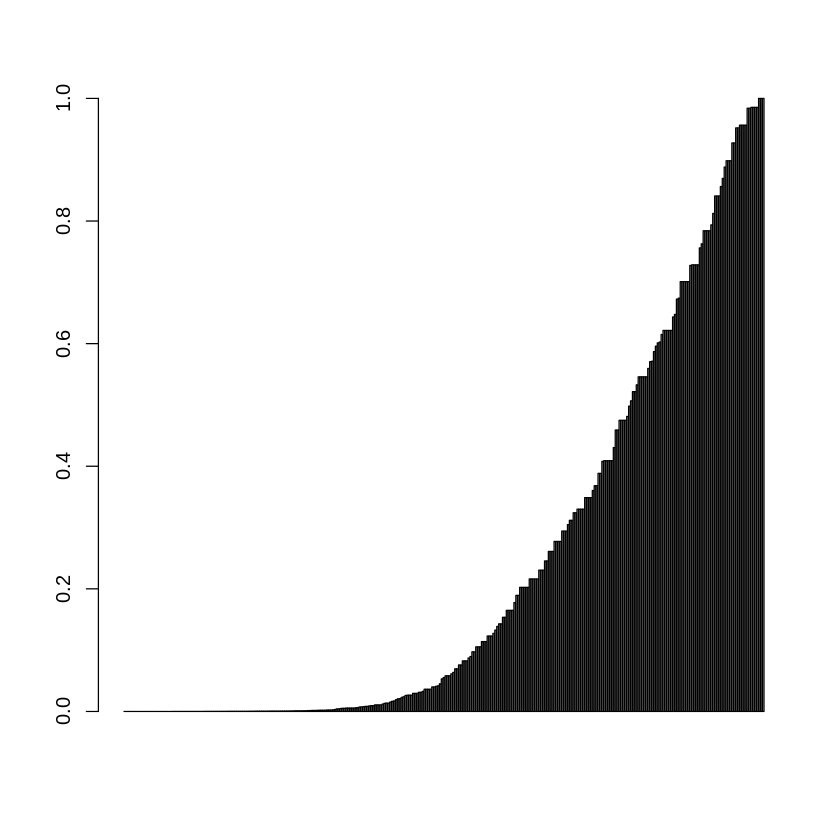

In [316]:
barplot(sort(p))

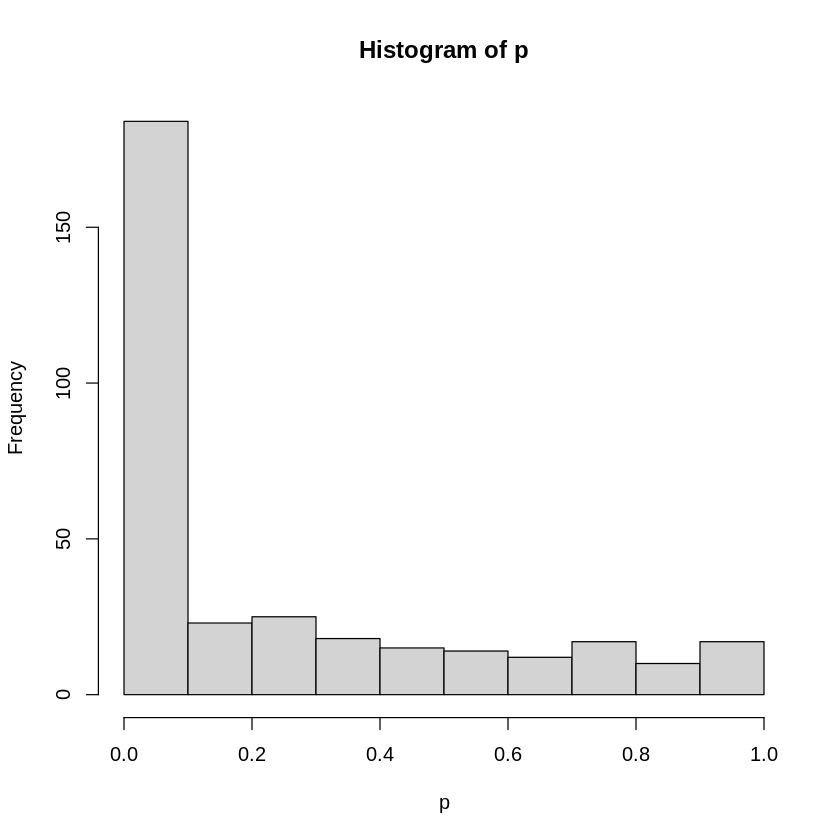

In [317]:
hist(p)

In [318]:
length(keep2)

[1] 163

In [319]:
keep2

[1] "X24"  "X38"  "X54"  "X75"  "X160" "X164" "X170" "X179" "X213" "X244"
 [11] "X269" "X272" "X274" "X275" "X282" "X288" "X297" "X301" "X313" "X316"
 [21] "X322" "X327" "X334" "X361" "X365" "X367" "X374" "X376" "X382" "X390"
 [31] "X398" "X409" "X413" "X417" "X419" "X422" "X427" "X429" "X430" "X434"
 [41] "X437" "X442" "X444" "X446" "X452" "X453" "X456" "X459" "X462" "X465"
 [51] "X468" "X469" "X476" "X479" "X484" "X485" "X486" "X491" "X492" "X493"
 [61] "X495" "X501" "X505" "X508" "X509" "X515" "X516" "X518" "X521" "X527"
 [71] "X531" "X533" "X539" "X547" "X550" "X551" "X552" "X554" "X560" "X562"
 [81] "X569" "X574" "X578" "X582" "X585" "X587" "X589" "X591" "X597" "X604"
 [91] "X605" "X607" "X609" "X615" "X618" "X626" "X629" "X642" "X647" "X652"
[101] "X655" "X658" "X665" "X666" "X668" "X672" "X676" "X681" "X685" "X686"
[111] "X692" "X694" "X697" "X698" "X699" "X701" "X703" "X705" "X708" "X710"
[121] "X714" "X715" "X723" "X725" "X727" "X732" "X733" "X743" "X747" "X749"
[131] "X751" "X752" "X756" "X757" "X758" "X759" "X761" "X765" "X769" "X777"
[141] "X783" "X787" "X789" "X790" "X796" "X801" "X805" "X806" "X808" "X813"
[151] "X817" "X828" "X829" "X842" "X844" "X851" "X870" "X922" "X960" "X963"
[161] "X966" "X975" "X977"

In [320]:
data = original_df[c(c("TBCat", "RA"),keep2)]
df = original_df[keep2]

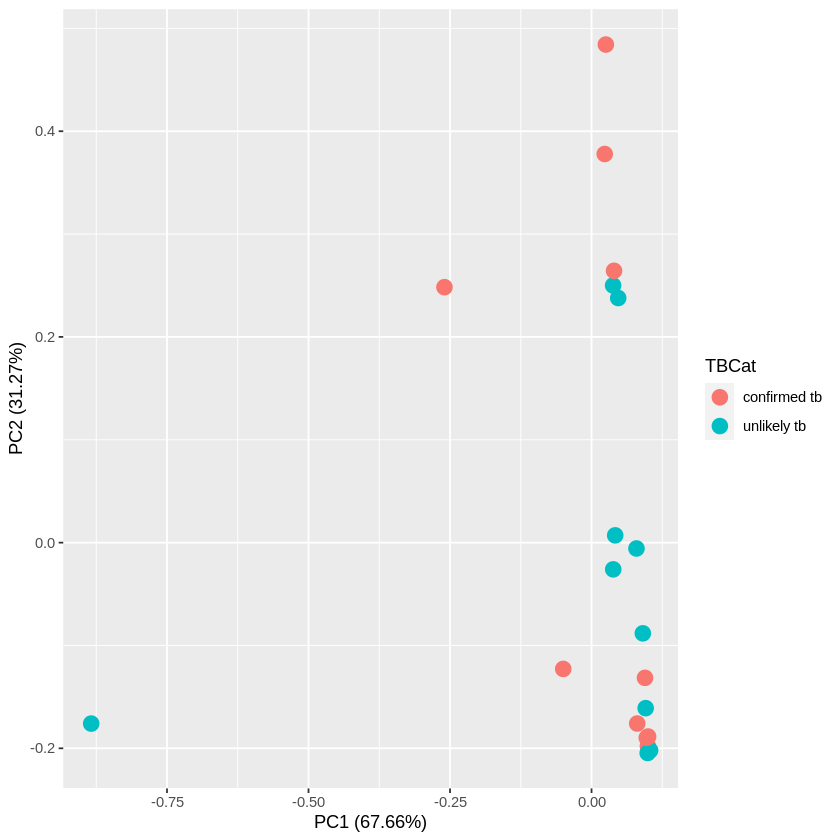

In [321]:
autoplot(prcomp(df), data=data, colour = "TBCat", size=4)


In [ ]:
install.packages("Boruta")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘RcppEigen’, ‘ranger’




In [ ]:
library(Boruta)